In [14]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import os

In [ ]:
print(os.path.dirname(os.getcwd()))

In [15]:
batch_size=30

# Place dataset folder in models directory (parent directory) beforehand. 

# Go up one level to the parent directory
parent_directory = os.path.dirname(os.getcwd())
train_dir = os.path.join(parent_directory, 'dataset', 'train')

test_dir = os.path.join(parent_directory, 'dataset', 'test')

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(240, 240),
  batch_size=batch_size
  )

test_data = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(240, 240),
  batch_size=batch_size,
  shuffle=False
  )

resnet_model = tf.keras.Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(240,240,3),
                   pooling='avg',
                   classes=70,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(70, activation='softmax'))

resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

epochs=3
history = resnet_model.fit(
  train_data,
  validation_data=test_data,
  epochs=epochs
)

Found 7946 files belonging to 70 classes.
Found 700 files belonging to 70 classes.
Epoch 1/3
265/265 ━━━━━━━━━━━━━━━━━━━━ 229s 849ms/step - accuracy: 0.5159 - loss: 1.9952 - val_accuracy: 0.8429 - val_loss: 0.4619
Epoch 2/3
265/265 ━━━━━━━━━━━━━━━━━━━━ 220s 831ms/step - accuracy: 0.8625 - loss: 0.4459 - val_accuracy: 0.8957 - val_loss: 0.3388
Epoch 3/3
265/265 ━━━━━━━━━━━━━━━━━━━━ 220s 831ms/step - accuracy: 0.9146 - loss: 0.2670 - val_accuracy: 0.8729 - val_loss: 0.3935


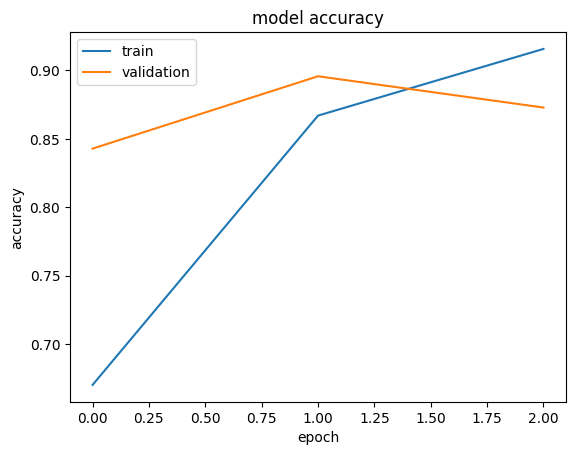

In [16]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])    
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [17]:
# Run model on test data

test_data_examples = np.concatenate([x for x, _ in test_data], axis=0)
predicted_labels = resnet_model.predict(test_data)

24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 781ms/step


In [18]:
# Display stats (precision, recall, f1-score and support) for test data

test_data_labels = np.concatenate([y for _, y in test_data], axis=0)
test_data_classes = [train_data.class_names[test_label] for test_label in test_data_labels]
predicted_classes = [train_data.class_names[np.argmax(predicted_label)] for predicted_label in predicted_labels]

print(classification_report(test_data_classes, predicted_classes))

                   precision    recall  f1-score   support

           Afghan       1.00      1.00      1.00        10
 African Wild Dog       0.91      1.00      0.95        10
         Airedale       1.00      0.80      0.89        10
American Hairless       1.00      0.80      0.89        10
 American Spaniel       0.47      0.90      0.62        10
          Basenji       0.77      1.00      0.87        10
           Basset       1.00      0.90      0.95        10
           Beagle       1.00      1.00      1.00        10
   Bearded Collie       1.00      0.80      0.89        10
         Bermaise       0.91      1.00      0.95        10
     Bichon Frise       1.00      1.00      1.00        10
         Blenheim       0.69      0.90      0.78        10
       Bloodhound       0.71      1.00      0.83        10
         Bluetick       1.00      1.00      1.00        10
    Border Collie       1.00      0.80      0.89        10
           Borzoi       1.00      0.90      0.95       